In [24]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import librosa.display

In [4]:
import wave, sys
# shows the sound waves
def visualize(path: str):
    
    # reading the audio file
    raw = wave.open(path)
      
    # reads all the frames 
    # -1 indicates all or max frames
    signal = raw.readframes(-1)
    signal = np.frombuffer(signal, dtype ="int16")
      
    # gets the frame rate
    f_rate = raw.getframerate()
  
    # to Plot the x-axis in seconds 
    # you need get the frame rate 
    # and divide by size of your signal
    # to create a Time Vector 
    # spaced linearly with the size 
    # of the audio file
    time = np.linspace(
        0, # start
        len(signal) / f_rate,
        num = len(signal)
    )
  
    # using matlplotlib to plot
    # creates a new figure
    plt.figure(1)
      
    # title of the plot
    plt.title("Sound Wave")
      
    # label of x-axis
    plt.xlabel("Time")
     
    # actual ploting
    plt.plot(time, signal)
      
    # shows the plot 
    # in new window
    plt.show()
  
    # you can also save
    # the plot using
    # plt.savefig('filename')

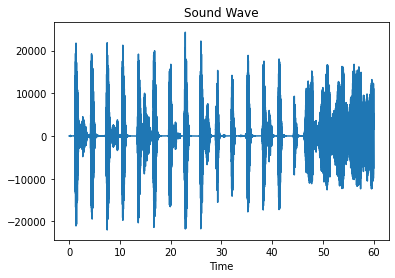

In [5]:
path = "../raw_data/056247/vocals.wav"
visualize(path)

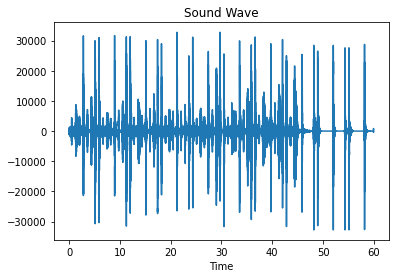

In [6]:
path = "../raw_data/056247/drums.wav"
visualize(path)

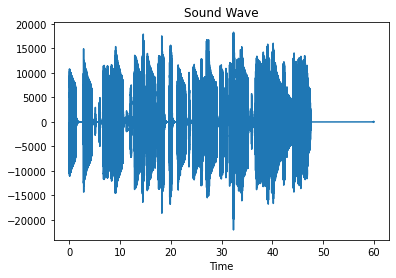

In [7]:
path = "../raw_data/056247/bass.wav"
visualize(path)

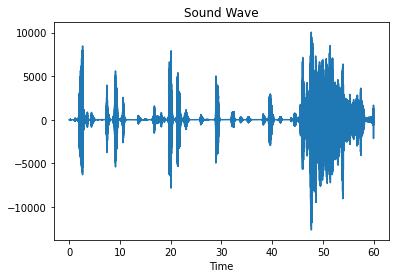

In [8]:
path = "../raw_data/056247/other.wav"
visualize(path)

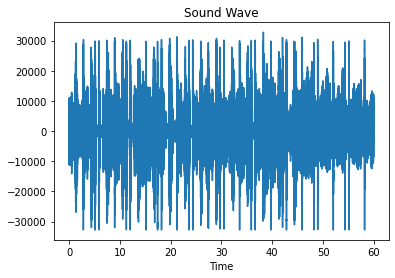

In [9]:
path = "../raw_data/056247.wav"
visualize(path)

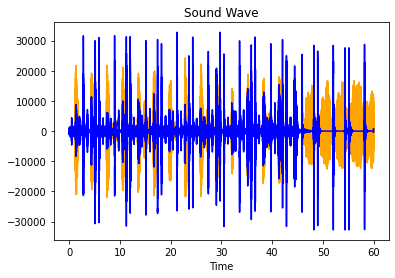

In [23]:
path = "../raw_data/056247/vocals.wav" 
raw = wave.open(path)
signal = raw.readframes(-1)
vocal_signal = np.frombuffer(signal, dtype ="int16")
f_rate = raw.getframerate()
time = np.linspace(
    0, # start
    len(vocal_signal) / f_rate,
    num = len(vocal_signal)
)
plt.figure(1)
plt.title("Sound Wave")
plt.xlabel("Time")
plt.plot(time, vocal_signal, color="orange")

path = "../raw_data/056247/drums.wav" 
raw = wave.open(path)
signal = raw.readframes(-1)
drums_signal = np.frombuffer(signal, dtype ="int16")
f_rate = raw.getframerate()
time = np.linspace(
    0, # start
    len(drums_signal) / f_rate,
    num = len(drums_signal)
)
plt.figure(1)
plt.title("Sound Wave")
plt.xlabel("Time")
plt.plot(time, drums_signal, color="blue")
plt.show()

In [11]:
path = "../raw_data/056247/drums.wav" 
raw = wave.open(path)
signal = raw.readframes(-1)
drums_signal = np.frombuffer(signal, dtype ="int16")

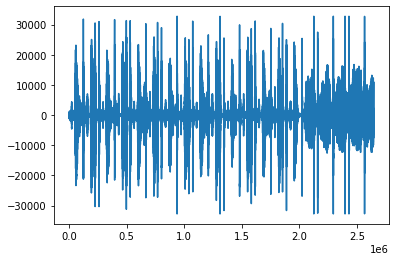

In [13]:
df = pd.DataFrame()
df["vocals"] = vocal_signal
df["drums"] = drums_signal
df["vocal_drums"] = df["vocals"]+df["drums"]
plt.plot(df["vocal_drums"])

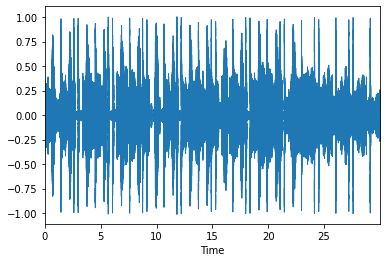

In [25]:
y, sr = librosa.load("../raw_data/056247.wav")
librosa.display.waveplot(y, sr)

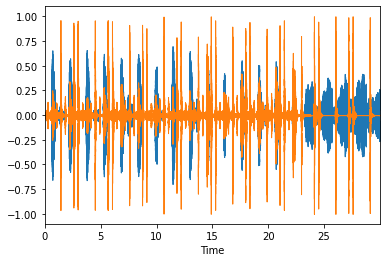

In [26]:
vocals, sr_vocals = librosa.load("../raw_data/056247/vocals.wav")
drums, sr_drums = librosa.load("../raw_data/056247/drums.wav")
librosa.display.waveplot(vocals, sr_vocals)
librosa.display.waveplot(drums, sr_drums)

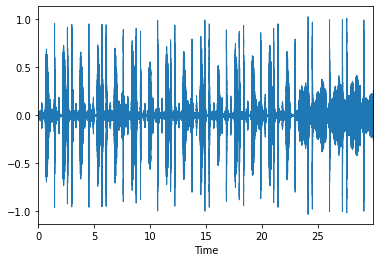

In [33]:
df = pd.DataFrame()
df["vocals"] = vocals
df["drums"] = drums
df["vocals_drums"] = df["vocals"] + df["drums"]
librosa.display.waveplot(np.array(df["vocals_drums"]), sr_drums)

In [55]:
stems = ["bass", "drums", "other", "vocals"]
def librosa_wave_df(file, stems, df):
    original = f'{file}.wav'
    total_files = [original]
    for stem in stems:
        total_files.append(f'{file}/{stem}.wav')
    for audio in total_files:
        y, sr = librosa.load(f'../raw_data/{audio}')
        df[audio] = y
#     fig, axes = plt.subplots(5,2, figsize=(17.7, 14.6))
#     librosa.display.waveplot(np.array(df["bass"]), sr_drums, axis=axes[0])
    df["mixed"] = df[f"{file}/{stems[0]}.wav"] + df[f"{file}/{stems[1]}.wav"] + df[f"{file}/{stems[2]}.wav"] + df[f"{file}/{stems[3]}.wav"]
    return df

In [56]:
df = pd.DataFrame()
df_new = librosa_wave_df("056247", stems, df)
#df_new["mixed"] = df["056247/bass.wav"] + df["056247/vocals.wav"] + df["056247/drums.wav"] + df["056247/other.wav"]

In [57]:
df_new

,056247.wav,056247/bass.wav,056247/drums.wav,056247/other.wav,056247/vocals.wav,mixed
0,-0.027223,-0.010777,-0.012570,-0.000020,-0.000054,-0.023421
1,-0.035612,-0.018081,-0.018781,-0.000036,0.000039,-0.036859
2,-0.030102,-0.019119,-0.010290,-0.000025,-0.000019,-0.029454
3,-0.040055,-0.023141,-0.017236,-0.000039,0.000018,-0.040398
4,-0.040708,-0.025327,-0.015139,-0.000047,-0.000018,-0.040531
...,...,...,...,...,...,...
660979,-0.074656,-0.000977,-0.000355,-0.009572,-0.063855,-0.074758
660980,-0.052118,-0.000196,-0.002457,-0.010039,-0.039278,-0.051970
660981,-0.031148,0.000427,-0.003295,-0.010146,-0.018414,-0.031428
660982,-0.006854,0.000996,0.004234,-0.014657,0.003074,-0.006353


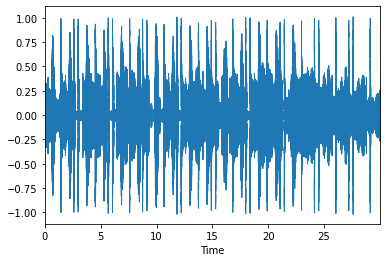

In [59]:
librosa.display.waveplot(np.array(df_new["mixed"]), sr)

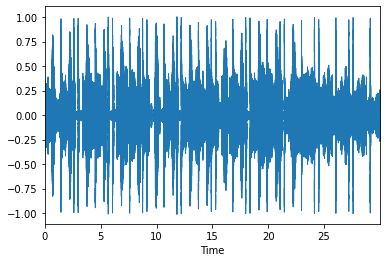

In [60]:
librosa.display.waveplot(np.array(df_new["056247.wav"]), sr)